In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# pip install plotly


In [3]:
# Step 1: Load the Excel file
incidence_age_group_file_path = "CDiA-2024-Book-1a-Cancer-incidence-age-standardised-rates-5-year-age-groups.xlsx"  # Replace with your actual file path
incidence_age_group_sheet_name = "Table S1a.1"  # Change this to the correct sheet name

mortality_age_group_file_path = "CDiA-2024-Book-2a-Cancer-mortality-and-age-standardised-rates-by-age-5-year-groups.xlsx" 
mortality_age_group_sheet_name = "Table S2a.1"

incidence_and_mortality_file_path = "CDiA-2024-Book-7-Cancer-incidence-and-mortality-by-state-and-territory.xlsx"  # Replace with your actual file path
incidence_and_mortality_sheet_1 = "Table S7.1"  # Change this to the correct sheet name
incidence_and_mortality_sheet_2 = "Table S7.2"
filter_values = ['Melanoma of the skin', 'Non-melanoma skin cancer (rare types)']


In [4]:
def process_excel(file_path, chosen_sheet_name, filter_values):
    xls = pd.ExcelFile(file_path)
    print(f"Available Sheets for {file_path}: \n", xls.sheet_names)

    df_cleaned = pd.read_excel(file_path, sheet_name=chosen_sheet_name, skiprows=5, engine="openpyxl") 
    # Drop fully empty columns
    df_cleaned = df_cleaned.dropna(axis=1, how="all")

    # Drop fully empty rows
    df_cleaned = df_cleaned.dropna(how="all")

    # Reset index (optional, if many rows are removed)
    df_cleaned.reset_index(drop=True, inplace=True)
    df_cleaned = df_cleaned[df_cleaned['Cancer group/site'].isin(filter_values)]
    return df_cleaned

def cast_columns(df, dtype_dict):
    """
    Casts columns of a DataFrame based on a given dictionary of column names and their target data types.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    dtype_dict (dict): A dictionary where keys are column names and values are target data types.

    Returns:
    pd.DataFrame: A DataFrame with the updated data types.
    """
    df = df.copy()  # Work on a copy to avoid modifying the original DataFrame

    for col, dtype in dtype_dict.items():
        if col in df.columns:
            try:
                df[col] = df[col].astype(dtype)
            except ValueError:
                print(f"Warning: Could not convert column '{col}' to {dtype}. Handling non-convertible values...")
                df[col] = pd.to_numeric(df[col], errors='coerce') if "int" in dtype or "float" in dtype else df[col].astype(str)

    return df



In [5]:
df_incidence_age_group = process_excel(incidence_age_group_file_path, incidence_age_group_sheet_name, filter_values)
df_mortality_age_group = process_excel(mortality_age_group_file_path, mortality_age_group_sheet_name, filter_values)

df_incidence_and_mortality_1 = process_excel(incidence_and_mortality_file_path, incidence_and_mortality_sheet_1, filter_values)
df_incidence_and_mortality_2 = process_excel(incidence_and_mortality_file_path, incidence_and_mortality_sheet_2, filter_values)

Available Sheets for CDiA-2024-Book-1a-Cancer-incidence-age-standardised-rates-5-year-age-groups.xlsx: 
 ['Welcome', 'Table S1a.1']
Available Sheets for CDiA-2024-Book-2a-Cancer-mortality-and-age-standardised-rates-by-age-5-year-groups.xlsx: 
 ['Welcome', 'Table S2a.1']
Available Sheets for CDiA-2024-Book-7-Cancer-incidence-and-mortality-by-state-and-territory.xlsx: 
 ['Welcome', 'Table S7.1', 'Table S7.2']
Available Sheets for CDiA-2024-Book-7-Cancer-incidence-and-mortality-by-state-and-territory.xlsx: 
 ['Welcome', 'Table S7.1', 'Table S7.2']


In [6]:
df_incidence_and_mortality_1.head(3)


,Data type,Cancer group/site,Year,Sex,State or Territory,Count,"Crude rate\n(per 100,000)","Age-standardised rate\n2001 Australian Standard Population \n(per 100,000)","Age-standardised rate\n2024 Australian population \n(per 100,000)",Unnamed: 9,ICD10 codes
38592,Incidence,Melanoma of the skin,1982.0,Males,New South Wales,650,24.6,28.9,33,,C43
38593,Incidence,Melanoma of the skin,1982.0,Males,Victoria,279,14.1,16.8,19.1,,C43
38594,Incidence,Melanoma of the skin,1982.0,Males,Queensland,474,38.9,49.5,56.8,,C43


In [7]:
# Apply function to your DataFrame
# df_incidence_and_mortality_1 = cast_columns(df_incidence_and_mortality_1, dtype_mapping)
df_list = [
    df_incidence_age_group, 
    df_mortality_age_group, 
    df_incidence_and_mortality_1, 
    df_incidence_and_mortality_2
]
# Example dictionary mapping columns to data types
dtype_mapping = {
    'Year': 'Int64',
    'Count': 'Int64',
    'Cancer group/site': 'string',
    'Sex': 'category',
    'State or Territory': 'string'
}

for i in range(len(df_list)):
    df_list[i] = cast_columns(df_list[i], dtype_mapping)


In [8]:
df_incidence_and_mortality_1.head(3)


,Data type,Cancer group/site,Year,Sex,State or Territory,Count,"Crude rate\n(per 100,000)","Age-standardised rate\n2001 Australian Standard Population \n(per 100,000)","Age-standardised rate\n2024 Australian population \n(per 100,000)",Unnamed: 9,ICD10 codes
38592,Incidence,Melanoma of the skin,1982.0,Males,New South Wales,650,24.6,28.9,33,,C43
38593,Incidence,Melanoma of the skin,1982.0,Males,Victoria,279,14.1,16.8,19.1,,C43
38594,Incidence,Melanoma of the skin,1982.0,Males,Queensland,474,38.9,49.5,56.8,,C43


In [9]:
df_incidence_and_mortality_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1593 entries, 38592 to 47960
Data columns (total 11 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Data type                                                                 1593 non-null   object 
 1   Cancer group/site                                                         1593 non-null   object 
 2   Year                                                                      1593 non-null   float64
 3   Sex                                                                       1593 non-null   object 
 4   State or Territory                                                        1593 non-null   object 
 5   Count                                                                     1593 non-null   object 
 6   Crude rate
(per 100,000)                                        

In [10]:
def clean_and_rename_columns(df):
    """
    Cleans specific columns by replacing 'n.a.' and 'n.p.' with 0 and renames them.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with cleaned and renamed columns.
    """
    # Define the column mappings
    column_mapping = {
        'Count': 'new_count',
        'Crude rate\n(per 100,000)': 'crude rate per 100k',
        'Age-standardised rate\n2001 Australian Standard Population \n(per 100,000)': 'age-standardised 2001',
        'Age-standardised rate\n2024 Australian population \n(per 100,000)': 'age-standardised 2024'
    }

    # Ensure only the required columns are processed
    df = df.copy()

    for old_col, new_col in column_mapping.items():
        if old_col in df.columns:
            # Replace 'n.a.' and 'n.p.' with 0
            df[old_col] = df[old_col].replace(['n.a.', 'n.p.'], 0)
            # Convert column to numeric (to handle cases where values are strings)
            df[old_col] = pd.to_numeric(df[old_col], errors='coerce').fillna(0)

    # Rename columns
    df = df.rename(columns=column_mapping)

    return df

# Apply the function to your DataFram
df_incidence_and_mortality_1 = clean_and_rename_columns(df_incidence_and_mortality_1)
df_incidence_and_mortality_2 = clean_and_rename_columns(df_incidence_and_mortality_2)
df_incidence_age_group = clean_and_rename_columns(df_incidence_age_group)
df_mortality_age_group = clean_and_rename_columns(df_mortality_age_group)



In [11]:
# Check the result
df_incidence_and_mortality_1.head()

,Data type,Cancer group/site,Year,Sex,State or Territory,new_count,crude rate per 100k,age-standardised 2001,age-standardised 2024,Unnamed: 9,ICD10 codes
38592,Incidence,Melanoma of the skin,1982.0,Males,New South Wales,650,24.6,28.9,33.0,,C43
38593,Incidence,Melanoma of the skin,1982.0,Males,Victoria,279,14.1,16.8,19.1,,C43
38594,Incidence,Melanoma of the skin,1982.0,Males,Queensland,474,38.9,49.5,56.8,,C43
38595,Incidence,Melanoma of the skin,1982.0,Males,Western Australia,164,24.2,31.1,35.4,,C43
38596,Incidence,Melanoma of the skin,1982.0,Males,South Australia,121,18.3,21.4,23.0,,C43


In [12]:
df_incidence_and_mortality_1.describe()

,Year,new_count,crude rate per 100k,age-standardised 2001,age-standardised 2024
count,1593.000000,1593.00000,1593.000000,1593.000000,1593.000000
mean,2004.220339,945.94978,27.970056,28.544444,33.371563
std,10.737552,1897.20391,22.733963,22.342066,26.356234
min,1982.000000,0.00000,0.000000,0.000000,0.000000
25%,1996.000000,41.00000,3.700000,3.300000,4.500000
50%,2006.000000,213.00000,28.800000,32.600000,36.700000
75%,2013.000000,945.00000,44.400000,44.600000,52.100000
max,2020.000000,15626.00000,103.200000,94.100000,113.700000


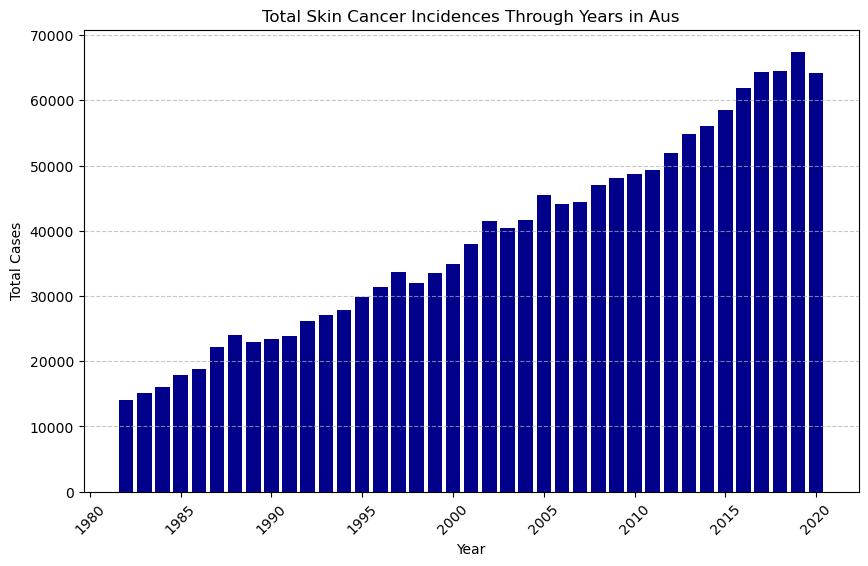

In [13]:
def plot_cancer_cases_by_year(df_incidence_and_mortality_1, category):
    """
    Plots the total skin cancer incidences over the years using 'new_count'.

    Parameters:
    df_incidence_and_mortality_1 (pd.DataFrame): DataFrame containing 'Year' and 'new_count' columns.

    Returns:
    None
    """
    # Ensure the required columns exist in the DataFrame
    required_columns = {'Year', 'new_count'}
    if not required_columns.issubset(df_incidence_and_mortality_1.columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")

    # Aggregate data by summing 'new_count' for each year
    df_grouped = df_incidence_and_mortality_1.groupby('Year', as_index=False)['new_count'].sum()

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(df_grouped['Year'], df_grouped['new_count'], color='darkblue')

    # Title and labels
    plt.title(f'Total Skin Cancer {category} Through Years in Aus')
    plt.xlabel('Year')
    plt.ylabel('Total Cases')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.show()

# Call the function with the updated dataset
plot_cancer_cases_by_year(df_incidence_and_mortality_1, 'Incidences')


In [14]:
def plot_cancer_cases_by_state(df_incidence_and_mortality_1, except_value, is_filtered, group_value_list, category):
    """
    Plots line charts showing total skin cancer incidences over the years for each State or Territory.

    Parameters:
    df_incidence_and_mortality_1 (pd.DataFrame): DataFrame containing 'Year', 'new_count', and 'State or Territory' columns.

    Returns:
    None
    """
    # Ensure the required columns exist in the DataFrame
#     required_columns = {'Year', 'new_count', 'State or Territory'}
#     if not required_columns.issubset(df_incidence_and_mortality_1.columns):
#         raise ValueError(f"DataFrame must contain the following columns: {required_columns}")
    
    #
    if is_filtered is True:
        df_incidence_and_mortality_1 = df_incidence_and_mortality_1[~df_incidence_and_mortality_1[group_value_list[1]].isin([except_value])]
        
    # Aggregate data by summing 'new_count' for each Year and State/Territory
    df_grouped = df_incidence_and_mortality_1.groupby(group_value_list, as_index=False)['new_count'].sum()

    # Create the plot
    plt.figure(figsize=(12, 7))

    # Plot each state as a separate series
    for state in df_grouped[group_value_list[1]].unique():
        state_data = df_grouped[df_grouped[group_value_list[1]] == state]
        plt.plot(state_data['Year'], state_data['new_count'], label=state, marker='o', linestyle='-')

    # Title anfd labels
    plt.title(f'Total Skin Cancer {category} Over Years by State')
    plt.xlabel('Year')
    plt.ylabel('Total Cases')
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability
    plt.grid(True, linestyle='--', alpha=0.7)

    # Show legend for states
    plt.legend(title=group_value_list[1], bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()




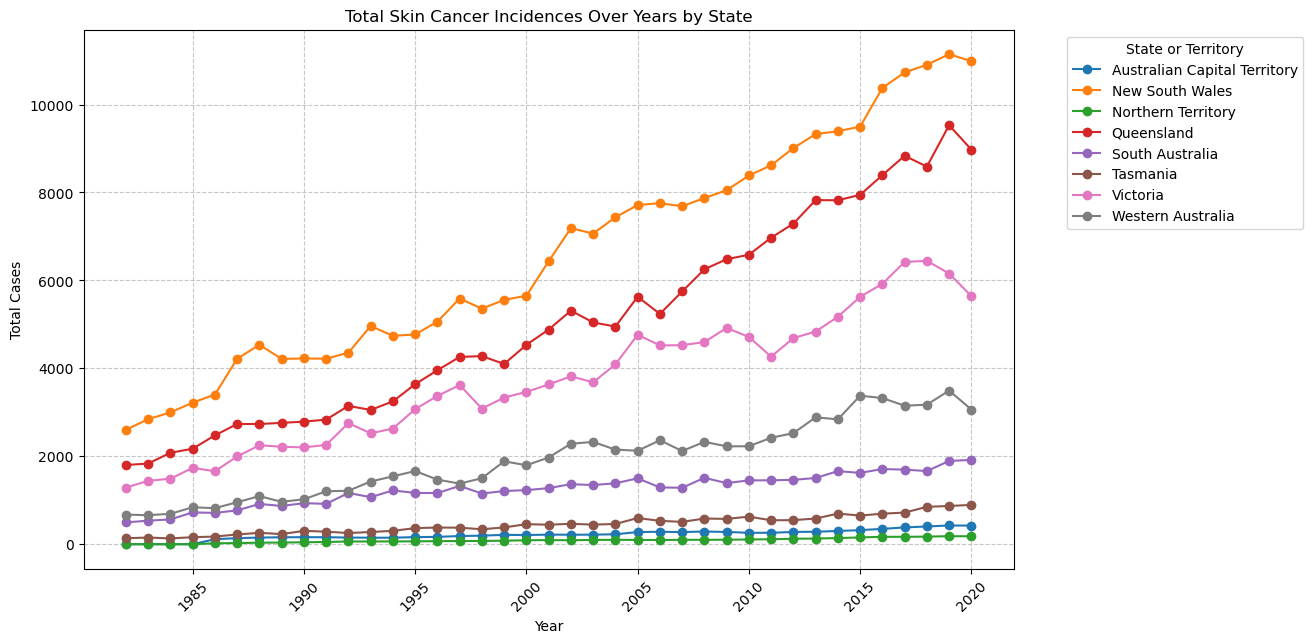

In [15]:
# Call the function with the updated dataset
plot_cancer_cases_by_state(df_incidence_and_mortality_1, 'Australia', True, ['Year', 'State or Territory'], 'Incidences')

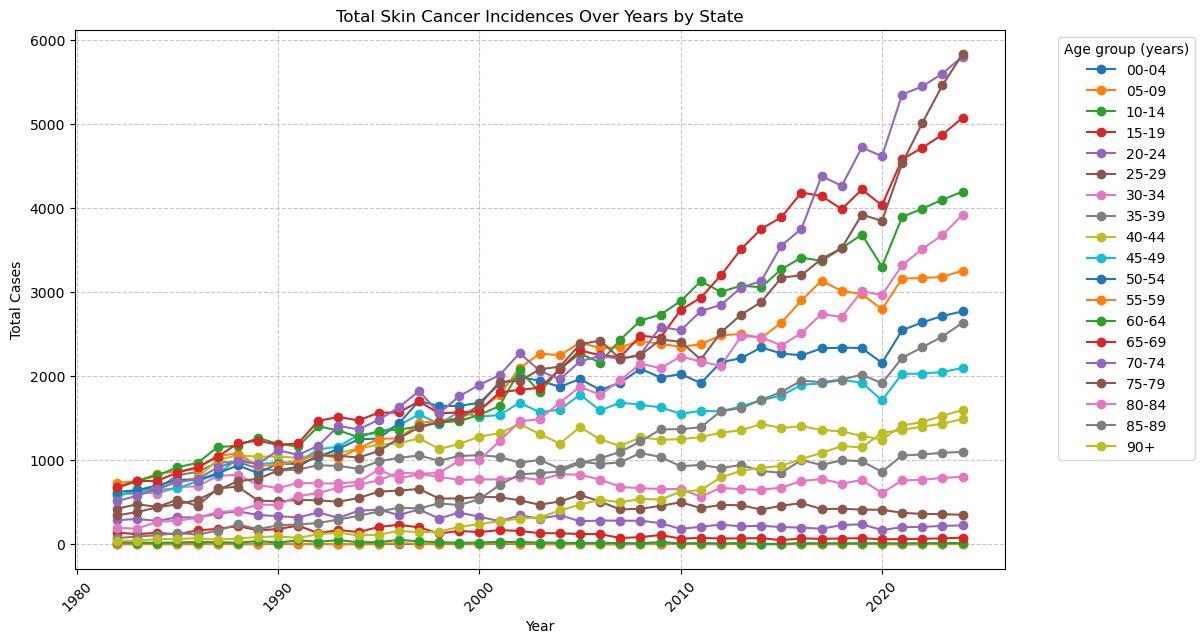

In [16]:
plot_cancer_cases_by_state(df_incidence_age_group, 'All ages combined', True, ['Year', 'Age group (years)'], 'Incidences')

In [21]:
def plot_cancer_cases_by_state_interactive(df_incidence_and_mortality_1, except_value, is_filtered, group_value_list, category):
    """
    Plots an interactive line chart showing total skin cancer incidences over the years for each State or Territory.
    Users can toggle visibility for different territories by interacting with the chart legend.

    Parameters:
    df_incidence_and_mortality_1 (pd.DataFrame): DataFrame containing 'Year', 'new_count', and 'State or Territory' columns.
    except_value (str): Value to exclude in filtering.
    is_filtered (bool): Flag indicating if data should be filtered.
    group_value_list (list): List of column names to group by.
    category (str): Category label for the plot title.

    Returns:
    None
    """
    # Filter data if necessary
    if is_filtered:
        df_incidence_and_mortality_1 = df_incidence_and_mortality_1[~df_incidence_and_mortality_1[group_value_list[1]].isin([except_value])]
    
    # Aggregate data by summing 'new_count' for each Year and State/Territory
    df_grouped = df_incidence_and_mortality_1.groupby(group_value_list, as_index=False)['new_count'].sum()

    # Create an interactive plot using plotly.express
    fig = px.line(df_grouped, x='Year', y='new_count', color=group_value_list[1],
                  title=f'Total Skin Cancer {category} Over Years by State',
                  labels={'new_count': 'Total Cases', 'Year': 'Year'},
                  markers=True)
    
    # Update layout to set background color to white, light grey grid for the y-axis, and bigger chart
    fig.update_layout(
        plot_bgcolor='white',  # Set background color to white
        xaxis=dict(
            tickmode='linear',
            rangeslider=dict(visible=True),  # Enable the range slider for Year
            title='Year',  # X-axis title
        ),
        yaxis=dict(
            title='Total Cases',  # Y-axis title
            gridcolor='lightgrey',  # Set a light grey grid color for the y-axis
            tickfont=dict(size=14)  # Increase the font size of the y-axis labels
        ),
        hovermode='closest',  # Show closest data on hover
        width=1000,  # Set chart width to be bigger
        height=600,  # Set chart height to be bigger
        title_x=0.24,  # Center title horizontally
        title_y=0.87,  # Bring the title closer to the chart
        legend=dict(
            orientation='h',  # Set legend horizontally
            yanchor='bottom',  # Place legend at the bottom
            y=-0.2,  # Position it below the chart
            xanchor='center',  # Center the legend
            x=0.5,  # Center the legend horizontally
        ),
        updatemenus=[dict(
            type='buttons',  # Use buttons instead of dropdown
            x=0.5,  # Center the button horizontally
            y=-0.6,  # Position the button below the chart
            buttons=[dict(
                label="Reset Year Filters",
                method="relayout",
                args=[{
                    'xaxis.range': [df_grouped['Year'].min(), df_grouped['Year'].max()],
                    'xaxis.rangeselector': {'visible': False}
                }]
            )],
            showactive=True,
            font=dict(size=12),  # Button text size
            xanchor='center',  # Center the button
            yanchor='top'
        )]
    )
    
    # Show the interactive plot
    fig.show()

# Example of how to call the function
plot_cancer_cases_by_state_interactive(df_incidence_and_mortality_1, 'Australia', True, ['Year', 'State or Territory'], 'Incidences')


In [22]:
import plotly.express as px
import pandas as pd

def plot_cancer_cases_by_age_interactive(df_incidence_and_mortality_1, except_value, is_filtered, group_value_list, category):
    """
    Plots an interactive line chart showing total skin cancer incidences over the years for each Age group.

    Parameters:
    df_incidence_and_mortality_1 (pd.DataFrame): DataFrame containing 'Year', 'new_count', and 'Age group' columns.
    except_value (str): Value to exclude in filtering.
    is_filtered (bool): Flag indicating if data should be filtered.
    group_value_list (list): List of column names to group by.
    category (str): Category label for the plot title.

    Returns:
    None
    """
    # Filter data if necessary
    if is_filtered:
        df_incidence_and_mortality_1 = df_incidence_and_mortality_1[~df_incidence_and_mortality_1[group_value_list[1]].isin([except_value])]
    
    # Aggregate data by summing 'new_count' for each Year and Age group
    df_grouped = df_incidence_and_mortality_1.groupby(group_value_list, as_index=False)['new_count'].sum()

    # Create an interactive plot using plotly.express
    fig = px.line(df_grouped, x='Year', y='new_count', color=group_value_list[1],
                  title=f'Total Skin Cancer {category} Over Years by Age Group',
                  labels={'new_count': 'Total Cases', 'Year': 'Year'},
                  markers=True)
    
    # Update layout to set background color to white, light grey grid for the y-axis, and bigger chart
    fig.update_layout(
        plot_bgcolor='white',  # Set background color to white
        xaxis=dict(
            tickmode='linear',
            rangeslider=dict(visible=True),  # Enable the range slider for Year
            title='Year',  # X-axis title
        ),
        yaxis=dict(
            title='Total Cases',  # Y-axis title
            gridcolor='lightgrey',  # Set a light grey grid color for the y-axis
            tickfont=dict(size=14)  # Increase the font size of the y-axis labels
        ),
        hovermode='closest',  # Show closest data on hover
        width=1000,  # Set chart width to be bigger
        height=600,  # Set chart height to be bigger
        title_x=0.24,  # Center title horizontally
        title_y=0.87,  # Bring the title closer to the chart
        updatemenus=[dict(
            type='buttons',  # Use buttons instead of dropdown
            x=0.5,  # Center the button horizontally
            y=-0.6,  # Position the button below the chart
            buttons=[dict(
                label="Reset Year Filters",
                method="relayout",
                args=[{
                    'xaxis.range': [df_grouped['Year'].min(), df_grouped['Year'].max()],
                    'xaxis.rangeselector': {'visible': False}
                }]
            )],
            showactive=True,
            font=dict(size=12),  # Button text size
            xanchor='center',  # Center the button
            yanchor='top'
        )]
    )
    
    # Show the interactive plot
    fig.show()

# Example of how to call the function
plot_cancer_cases_by_age_interactive(df_incidence_age_group, 'All ages combined', True, ['Year', 'Age group (years)'], 'Incidences')


In [ ]:
# plot_cancer_cases_by_state(df_incidence_and_mortality_2, 'Australia', True, ['Year', 'State or Territory'], 'Mortality')

In [ ]:
# plot_cancer_cases_by_state(df_mortality_age_group, 'All ages combined', True, ['Year', 'Age group (years)'], 'Mortality')

# Process charts